### We are trying to do a logistic regression using neural network concepts ###
#### The idea is to develop a simple neural network for binary classification of images (cat / no-cat) ####
#### We'll just use basic numpy functions to develop this model and try to predict with help of that ####
#### This would help form the basic idea on LR and Neural Network as well ####

In [135]:
# Information about notations, dimensions etc

# m - number of training examples
# nx - number of input features
# each image dimension : h pixel x w pixel x 3 colours(RGB)
# so nx = h * w * 3
# dimension for one training example x(i): nx x 1 # nx rows, 1 column
# dimension for all training examples X : nx x m
# dimension for one training example output label y(i): 1 x 1 
# dimension for all training example output labels Y : 1 x m

# model:
# yhat(i) = sigmoid(z(i)) = sigmoid(wT*x(i) + b) where w = weight matrix; wT = transpose of w; b = bias
# we denote: z(i) = wT*x(i) + b
# now, w dimension : nx x 1
# wT dimension : 1 x nx
# wT * X => [1 x nx] * [nx x m] => [1 x m] matrix
# As a result: sigmoid(wT * X + b) is [1 x m] matrix which is Yhat 
# So in forward propagation, we calculate Yhat i.e. all yhat(i)
# Z => [z(1) z(2) ... z(m)] => [1 x m] matrix

# Now Loss function for one example: L(yhat(i),y(i)) = -[y(i)log(yhat(i))+ (1-y(i))log(1-yhat(i))]
# Overall Cost function J = (1/m) * Sum over all individual examples Loss function
# Now we have to minimize this J - so do the back propagation 

# Now w: [nx x 1] matrix 
#[... i.e. w1, w2,..., wnx - corresponding to each input features]
#[by calculus, it is shown that for one training example(i) dw1 (i.e. dJ/dw1) += x(i)1*dz(i) where dz(i)=yhat(i)-y(i)]
#[and dZ = Yhat - Y; dimension: [1 x m]; so dZT dimension: [m x 1]]
# dw: [nx x 1] matrix; dw = (1/m)* X * dZT; dimension: [nx x m] * [m x 1] => [nx x 1]; same dimension as w
# db = (1/m)* Sum(dZ)
# Back prop: w = w - alpha * dw; b = b - alpha*db; 

### Loading input data and understanding ###

In [136]:
# load train, test set
import h5py

train_set_path = 'datasets_cat_vs_non_cat/train_catvnoncat.h5'
test_set_path = 'datasets_cat_vs_non_cat/test_catvnoncat.h5'

train_dataset = h5py.File(train_set_path, "r")
test_dataset = h5py.File(test_set_path, "r")

In [137]:
type(train_dataset)

h5py._hl.files.File

In [138]:
list(train_dataset.keys()) # this is an useful command to understand h5 file

['list_classes', 'train_set_x', 'train_set_y']

In [139]:
train_dataset['list_classes']

<HDF5 dataset "list_classes": shape (2,), type "|S7">

In [140]:
train_dataset['list_classes'][0]

b'non-cat'

In [141]:
train_dataset['list_classes'][1]

b'cat'

In [142]:
train_dataset['train_set_x']

<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">

In [143]:
train_dataset['train_set_y']

<HDF5 dataset "train_set_y": shape (209,), type "<i8">

In [144]:
list(test_dataset.keys())

['list_classes', 'test_set_x', 'test_set_y']

In [145]:
test_dataset['test_set_x']

<HDF5 dataset "test_set_x": shape (50, 64, 64, 3), type "|u1">

In [146]:
# so we have 209 training example and 50 test examples
# each image is 64 x 64 x 3

In [147]:
import numpy as np

In [148]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
classes = np.array(test_dataset["list_classes"][:]) # the list of classes

In [149]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [150]:
train_set_y_orig.shape

(209,)

In [151]:
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0])) # stacking horizontally
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [152]:
train_set_y_orig.shape

(1, 209)

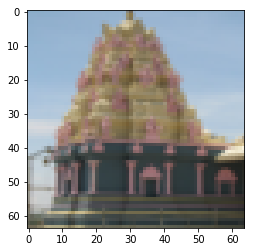

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_set_x_orig[158]) #check random image

### Setting variables ###

In [154]:
m_train = train_set_x_orig.shape[0]
m_test= test_set_x_orig.shape[0]
print(m_train, m_test)

209 50


In [155]:
h = train_set_x_orig.shape[1]
h

64

In [156]:
w = train_set_x_orig.shape[2]
w

64

In [157]:
nx = h*w*3
nx

12288

#### Flatten X ####

In [158]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [159]:
train_set_x_flatten = train_set_x_orig.reshape((m_train,nx))

In [160]:
# verify with a random sample
train_set_x_orig[12]

array([[[154, 153, 110],
        [125, 125,  90],
        [ 76,  77,  57],
        ...,
        [ 19,  19,  17],
        [ 21,  22,  18],
        [ 23,  24,  19]],

       [[128, 127,  92],
        [ 82,  82,  61],
        [ 45,  46,  35],
        ...,
        [ 17,  17,  15],
        [ 19,  19,  17],
        [ 21,  21,  18]],

       [[ 85,  85,  63],
        [ 41,  42,  33],
        [ 25,  26,  21],
        ...,
        [ 15,  15,  13],
        [ 17,  17,  15],
        [ 18,  18,  16]],

       ...,

       [[ 46,  46,  35],
        [ 48,  48,  36],
        [ 55,  55,  42],
        ...,
        [ 82,  81,  61],
        [ 84,  83,  62],
        [ 82,  81,  61]],

       [[ 39,  39,  30],
        [ 47,  47,  37],
        [ 57,  58,  44],
        ...,
        [ 84,  83,  62],
        [ 83,  82,  61],
        [ 77,  77,  57]],

       [[ 35,  35,  27],
        [ 45,  45,  35],
        [ 57,  58,  44],
        ...,
        [ 86,  85,  64],
        [ 82,  81,  60],
        [ 75,  75,  56]]

In [161]:
train_set_x_flatten[12]

array([154, 153, 110, ...,  75,  75,  56], dtype=uint8)

In [162]:
train_set_x_flatten = train_set_x_flatten.T # stack all the x(i) horizontally

In [163]:
train_set_x_flatten.shape

(12288, 209)

In [164]:
train_set_x_flatten[:,12]

array([154, 153, 110, ...,  75,  75,  56], dtype=uint8)

In [165]:
test_set_x_flatten = test_set_x_orig.reshape((m_test,nx)).T

In [166]:
test_set_x_flatten.shape

(12288, 50)

In [167]:
# scaling of features
train_set_x_flatten = train_set_x_flatten/255
test_set_x_flatten = test_set_x_flatten/255

### Building the LR model as a small NN ###

In [168]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [169]:
sigmoid(np.array([0, 2]))

array([0.5       , 0.88079708])

In [170]:
# w dimension : nx x 1
# initialize with zero
w = np.zeros((nx,1))
b = 0

In [171]:
w.shape

(12288, 1)

In [172]:
b

0

In [181]:
number_iteration = 2000

In [174]:
X = train_set_x_flatten
Y = train_set_y_orig
m = m_train
print(X.shape, Y.shape, m)

(12288, 209) (1, 209) 209


In [175]:
# Write Cost function and test it
def Cost(Y, Yhat):
    m = Y.shape[1]
    J = (-1/m)* np.sum(Y*np.log(Yhat) + (1-Y)*np.log(1-Yhat))
    return J

In [187]:
# initialize few variables
#Yhat = np.zeros(Y.shape) # 1 x m # commenting this line - otherwise problem with np.log()
J = 0.0
dZ = np.zeros(Y.shape) # 1 x m
dw = np.zeros(w.shape)
db = 0.0
alpha = 0.01
#

for i in range(number_iteration):
    # for each iteration, we'll do the forward pass and calculate Yhat first
    # Then we'll calculate the Cost J
    # Then we'll do the backward pass i.e. calculate the derivatives and update w,b
    
    # FORWARD PASS
    Yhat = sigmoid(np.dot(w.T,X)+b) # dimension check: [1 x nx] x [nx x m] => [1 x m]
    
    # COST
    J = (-1/m)* np.sum(Y*np.log(Yhat) + (1-Y)*np.log(1-Yhat))
    # print cost to see if this is working
    if (i%100==0):
        print('iterataion ' + str(i))
        print('Cost ' + str(J))
    #
    
    # DERIVATIVES FOR BACK-PROPAGATION
    dZ = Yhat - Y # dimension: [1 x m]
    dw = (1/m)* np.dot(X, dZ.T) # dimension: [nx x m] x [m x 1] => [nx x 1]
    db = (1/m)* np.sum(dZ)
    
    
    # UPDATE PARAMETERS
    w = w - alpha*dw
    b = b - alpha*db

iterataion 0
Cost 0.04671901504145274
iterataion 100
Cost 0.04544448782858528
iterataion 200
Cost 0.044235287066799696
iterataion 300
Cost 0.04308660509863033
iterataion 400
Cost 0.04199409072884283
iterataion 500
Cost 0.040953796456596234
iterataion 600
Cost 0.03996213286653019
iterataion 700
Cost 0.039015829067847514
iterataion 800
Cost 0.038111898264009035
iterataion 900
Cost 0.0372476076918532
iterataion 1000
Cost 0.036420452295708394
iterataion 1100
Cost 0.03562813160546445
iterataion 1200
Cost 0.03486852937232398
iterataion 1300
Cost 0.03413969558574305
iterataion 1400
Cost 0.03343983055278775
iterataion 1500
Cost 0.03276727076906054
iterataion 1600
Cost 0.03212047635030417
iterataion 1700
Cost 0.03149801982722307
iterataion 1800
Cost 0.030898576134136723
iterataion 1900
Cost 0.030320913645733513


In [183]:
w

array([[ 0.01451977],
       [-0.03868506],
       [-0.01718982],
       ...,
       [-0.01624916],
       [-0.04051552],
       [ 0.03650509]])

In [185]:
b

-0.0038051227273954266

In [184]:
J

0.06462578073874715

### Now try prediciting ###

In [188]:
X = test_set_x_flatten
TestYhat = sigmoid(np.dot(w.T,X)+b)

In [189]:
TestYhat.shape

(1, 50)

In [190]:
TestYhat

array([[9.92140482e-01, 9.70954469e-01, 9.49514560e-01, 9.92563788e-01,
        8.56382234e-01, 5.06124454e-01, 1.36068331e-03, 9.24295765e-01,
        9.31238842e-01, 7.86582954e-01, 8.34928644e-02, 3.11000508e-01,
        7.71466445e-01, 9.39817805e-01, 8.17700540e-04, 9.83767150e-01,
        5.02565428e-03, 9.66743431e-01, 7.17347171e-02, 2.19623807e-03,
        9.94102148e-01, 1.20725656e-01, 7.06730102e-04, 9.51655896e-01,
        4.34452346e-01, 7.26273561e-01, 9.51758867e-01, 4.83820242e-04,
        1.67713127e-03, 9.99900172e-01, 3.74728162e-02, 8.81654887e-01,
        6.54252071e-01, 5.36900344e-01, 5.40713205e-01, 3.22485325e-03,
        1.28862417e-02, 8.38744780e-01, 1.97235971e-01, 1.19334781e-02,
        8.58129314e-01, 1.74587016e-01, 7.19550120e-01, 1.55419646e-03,
        9.92389047e-01, 8.96997597e-01, 9.08585099e-02, 9.99348625e-01,
        7.65103383e-01, 3.91082580e-02]])

In [191]:
TestYhat2 = np.zeros(TestYhat.shape)
for i in range(TestYhat.shape[1]):
    if TestYhat[0,i]>= 0.5:
        TestYhat2[0,i]=1    

In [192]:
TestYhat2

array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
        1., 0.]])

In [193]:
test_set_y_orig

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]], dtype=int64)

In [195]:
Error = (TestYhat2 != test_set_y_orig)
Error

array([[False, False, False, False, False,  True,  True, False, False,
        False,  True,  True, False,  True, False, False, False, False,
         True,  True, False, False, False, False,  True, False, False,
        False,  True,  True,  True, False, False, False,  True, False,
        False, False, False, False, False,  True, False, False,  True,
         True,  True, False, False, False]])

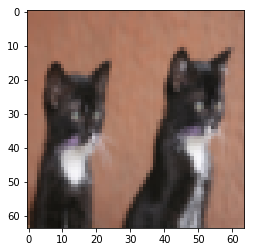

In [201]:
plt.imshow(test_set_x_orig[0]) #check random image

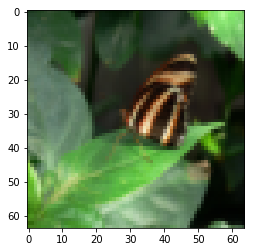

In [202]:
plt.imshow(test_set_x_orig[5]) #check random image

In [197]:
np.sum(Error)

16

In [198]:
# percentage error
np.sum(Error)/Error.shape[1]

0.32

### So with this basic model we are getting about 68% accuracy :) ###

In [199]:
## This is inspired by a course on deep learning by Andrew Ng ##